# 본 내용은 인프런의 강의명(딥러닝 CNN 완벽 가이드 - Fundamental 편)를 듣고 요약했습니다.
+ 이미지를 함부로 가져가지 말아주세요

## CIFAR10 데이터 수집

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
# label shape가 2차원으로 되어있다.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

170500096/170498071 [==============================] - 6s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [4]:
# train images 중 첫 번째 이미지
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [5]:
# 총 10개 객체가 존재
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10]) # label 값 10개 확인 

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## CIFAR10 데이터 시각화
+ 이미지 크기는 32x32이며 RGB채널
+ 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고 Label 대상 오브젝트 위주로 이미작 구성

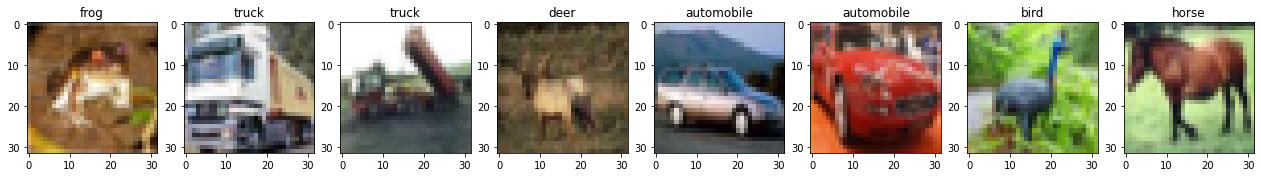

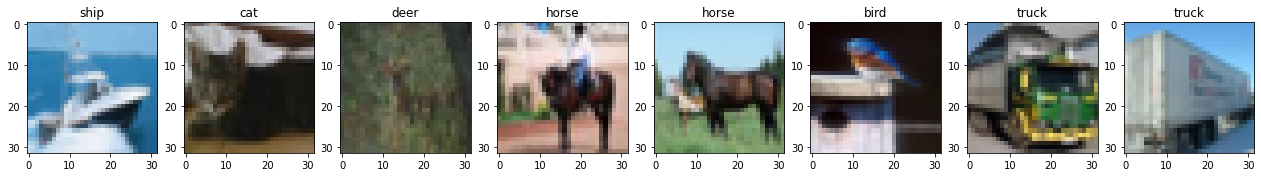

In [6]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_images(images, labels, ncols=8):   # nrows=1로 고정 -> 8개씩 나온다
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()   # label의 2차원 -> 1차원으로 변경
        axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [7]:
# one-hot encoding이 가능하지만, sparse caategorical crossentropy 테스트를 적용
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이 값으로 scale 및 float32 변형
    images = np.array(images/255, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [8]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

## 주의사항
+ keras는 CNN 2D 모델에 학습 데이터를 입력할 경우, Image array는 4차원 배열(batch_size, height, width, channel)
+ RGB 채널 이미지 array는 기본적으로 3차원, 여기에 이미지 개수(batch_size) 포함하여 4차원
+ 만약 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어주고, 여기에 이미지 개수 포함 4차원 변형

In [9]:
# label 데이터가 2차원
# keras 모델에는 문제없이 작동하지만, one-hot encoding 적요이 안되었는지를 알 수 있게 1차원 표현해 주는 것이 좋음
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

## Custom Model 생성

In [10]:
# 313/313 [==============================] - 3s 10ms/step - loss: 0.8015 - accuracy: 0.7614
# 76% 정확
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

IMAGE_SIZE = 32
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # batch_size를 제외한 3차원

x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
              
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
                 
# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units 개수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)
 
model = Model(inputs=input_tensor, outputs=output)
                 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0     

In [27]:
# 모델 구조를 변형해서 test 해보기
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

IMAGE_SIZE = 32
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # batch_size를 제외한 3차원

# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
              
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
                 
# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units 개수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)
 
model = Model(inputs=input_tensor, outputs=output)
                 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0   

In [28]:
# one-hot encoding이 아니므로 loss는 sparse_categorical_crossentropy 사용
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 20s 29ms/step - loss: 1.9213 - accuracy: 0.2765 - val_loss: 1.3411 - val_accuracy: 0.5047
Epoch 2/30
665/665 [==============================] - 19s 28ms/step - loss: 1.2488 - accuracy: 0.5436 - val_loss: 1.0648 - val_accuracy: 0.6149
Epoch 3/30
665/665 [==============================] - 19s 28ms/step - loss: 1.0235 - accuracy: 0.6357 - val_loss: 0.9413 - val_accuracy: 0.6709
Epoch 4/30
665/665 [==============================] - 19s 28ms/step - loss: 0.8945 - accuracy: 0.6831 - val_loss: 0.8396 - val_accuracy: 0.7059
Epoch 5/30
665/665 [==============================] - 19s 28ms/step - loss: 0.7948 - accuracy: 0.7224 - val_loss: 0.7476 - val_accuracy: 0.7352
Epoch 6/30
665/665 [==============================] - 19s 28ms/step - loss: 0.7170 - accuracy: 0.7468 - val_loss: 0.7195 - val_accuracy: 0.7477
Epoch 7/30
665/665 [==============================] - 19s 28ms/step - loss: 0.6455 - accuracy: 0.7724 - val_loss: 0.6763 - val_accuracy:

## 결과 확인

313/313 [==============================] - 3s 10ms/step - loss: 0.8015 - accuracy: 0.7614


[0.8015497326850891, 0.7613999843597412]

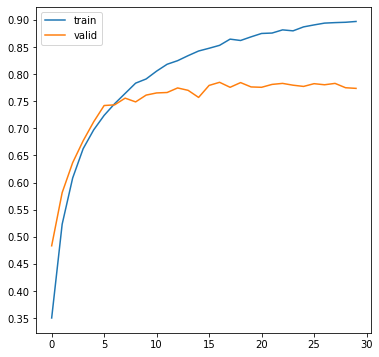

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

## model.predict()를 통해 이미지 분류 예측
+ 4차원 이미지 배열을 입력해서 모델 학슴함. predict()에서도 4차원 이미지 배열을 입력함.
+ 하습 데이터의 원-핫 인코딩 적용 여부와 관ㄱ없이 softmax 적용 결과는 무조건 **2차원** 유의

In [15]:
# 아래 코드 오류 발생.
# Conv2D는 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했다.
# predict() 시도에서도 테스트용 4차원 이미지 배열을 입력해야한다.
preds = model.predict(test_images[0]) # 3차원 이미지 배열

# ValueError message
# expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [18]:
# np.expand_dims를 사용
preds = model.predict(np.expand_dims(test_images[0], axis=0))
# 예측 결과가 10개가 나옴.
# softmax는 2차원 결과 값을 전달한다.
print('예측 결과 shape:', preds.shape) 
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[6.1576799e-07 1.4064979e-08 2.6934457e-04 8.9533180e-01 3.9883245e-05
  5.9656776e-02 4.4696778e-02 1.2452945e-06 3.4579705e-06 9.2274917e-08]]


In [21]:
# 한 번에 32개를 해라는 의미
preds = model.predict(test_images[:32])
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[6.15768045e-07 1.40649261e-08 2.69344309e-04 8.95331860e-01
  3.98832090e-05 5.96567243e-02 4.46967185e-02 1.24529356e-06
  3.45796434e-06 9.22749237e-08]
 [4.14853171e-03 8.89611244e-03 1.11866984e-06 7.76298293e-06
  2.12397003e-06 1.42383982e-07 1.07349081e-06 7.76491049e-09
  9.86795425e-01 1.47616272e-04]
 [2.55365651e-02 1.67398516e-03 1.56529096e-03 7.49073830e-03
  5.81047789e-04 6.76397234e-04 1.34558592e-03 9.77733725e-05
  9.51715946e-01 9.31668188e-03]
 [9.86234844e-01 2.55825648e-06 9.54202004e-03 1.52690092e-03
  3.95539828e-05 1.94929999e-05 1.42400304e-05 1.54813154e-06
  2.58945115e-03 2.92895947e-05]
 [5.36291331e-08 2.86554513e-11 2.42942153e-03 4.37836209e-03
  8.00184906e-01 1.46017592e-05 1.92992672e-01 4.82528219e-11
  1.28852626e-08 5.62633939e-10]
 [5.33597311e-04 3.31456795e-05 3.00567988e-02 5.39654493e-02
  1.16955321e-02 7.36841187e-02 8.29218805e-01 3.92553280e-04
  1.19148244e-04 3.00906977e-04]
 [3.32227081e-08 3.53473537e-

In [22]:
# np.armax를 사용해야한다.
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 4 6 9 3 3 1 0 9 5 7 9 6 5 5 8 6 7 2 0 9 4 5 6 0 9 6 6 5]


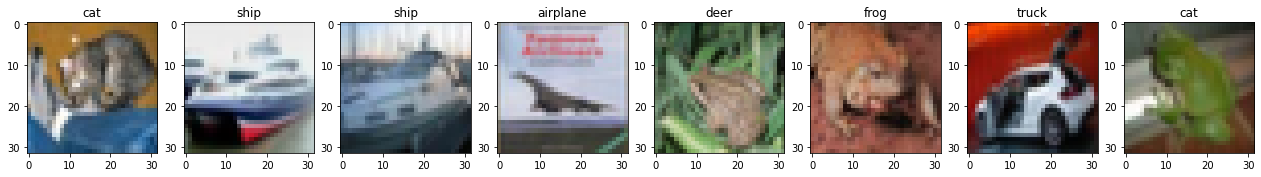

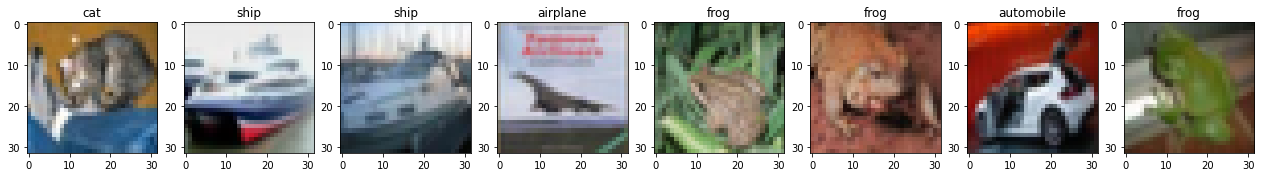

In [24]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)